This file includes analyis with all the features in the dataset. This means running the meachine learning methods without doing the feature selection methods so all feature are used in the model for predictive modeling.

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report, cohen_kappa_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers

%matplotlib inline

TensorFlow 2.x selected.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving divorce.xlsx to divorce.xlsx


In [ ]:
data = pd.read_excel("divorce.xlsx") 
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
X = data.loc[:, 'Atr1':'Atr54']
y = data[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**LOGISTIC REGRESSION**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logreg = logreg.predict(X_test)
Logistic = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [ ]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[26  1]
 [ 2 22]]


In [ ]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.96      0.92      0.94        24

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
model_lg = logreg.fit(X_train, y_train)
probs = model_lg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


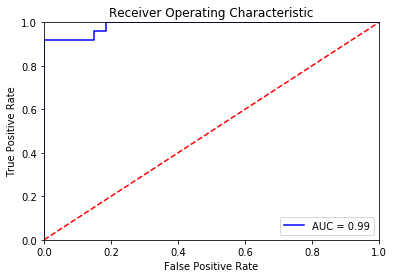

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
logreg_ks = cohen_kappa_score(y_test, y_pred_logreg)
logreg_ks

0.8816705336426914

**LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

print(model_lda.priors_)

[0.49579832 0.50420168]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_lda = model_lda.predict(X_test)
print(np.unique(y_pred_lda, return_counts=True))

(array([0, 1]), array([29, 22]))


In [ ]:
print(confusion_matrix(y_pred_lda, y_test))
print(classification_report(y_test, y_pred_lda, digits=3))

[[27  2]
 [ 0 22]]
              precision    recall  f1-score   support

           0      0.931     1.000     0.964        27
           1      1.000     0.917     0.957        24

    accuracy                          0.961        51
   macro avg      0.966     0.958     0.960        51
weighted avg      0.963     0.961     0.961        51



In [ ]:
Linear = accuracy_score(y_test, y_pred_lda)
print(Linear)

0.9607843137254902


In [ ]:
lda_ks = cohen_kappa_score(y_test, y_pred_lda)
lda_ks

0.9209302325581395

**QUADRATIC DISCRIMINANT ANALYSIS**

In [ ]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
y_pred_qda = model_qda.predict(X_test)
print(np.unique(y_pred_qda, return_counts=True))
print(confusion_matrix(y_pred_qda, y_test))
print(classification_report(y_test, y_pred_qda, digits=3))

(array([0, 1]), array([32, 19]))
[[27  5]
 [ 0 19]]
              precision    recall  f1-score   support

           0      0.844     1.000     0.915        27
           1      1.000     0.792     0.884        24

    accuracy                          0.902        51
   macro avg      0.922     0.896     0.899        51
weighted avg      0.917     0.902     0.900        51



In [ ]:
Quadratic = accuracy_score(y_test, y_pred_qda)
print(Quadratic)

0.9019607843137255


In [ ]:
qda_ks = cohen_kappa_score(y_test, y_pred_qda)
qda_ks

0.8009367681498829

**K-Nearest Neighbours**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)


In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)


In [ ]:
knn_10 = accuracy_score(y_test, y_pred_knn)
knn_10

0.9607843137254902

In [ ]:
knn_ks = cohen_kappa_score(y_test, y_pred_knn)
knn_ks

0.9209302325581395

**Random Forest**

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring= 'roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[27  0]
 [ 2 22]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.92      0.96        24

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



=== All AUC Scores ===
[0.94444444 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9944444444444445


In [ ]:
RandomForest = accuracy_score(y_test, rfc_predict)
print(RandomForest)

0.9607843137254902


In [ ]:
rfc_ks = cohen_kappa_score(y_test, rfc_predict)
rfc_ks

0.9209302325581395

**Decision Tree**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

DT = accuracy_score(y_test, y_pred_dt)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.9215686274509803


In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_dt))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.88      0.96      0.92        24

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51





In [ ]:
dt_ks = cohen_kappa_score(y_test, y_pred_dt)
dt_ks

0.8433179723502304

**Support Vector Machine**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[27  0]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.92      0.96        24

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [ ]:
SVM_Score = accuracy_score(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9607843137254902


In [ ]:
svm_ks = cohen_kappa_score(y_test, y_pred_svm)
svm_ks

0.9209302325581395

**Deep Learning**

In [ ]:
dataframe = data

In [ ]:
train, test = train_test_split(dataframe, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

83 train examples
36 validation examples
51 test examples


In [ ]:
feature_columns = []

# numeric cols
for header in ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 
               'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 
               'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 
               'Atr31', 'Atr32', 'Atr33', 'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 
               'Atr41', 'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50', 
               'Atr51', 'Atr52', 'Atr53', 'Atr54']:
  feature_columns.append(feature_column.numeric_column(header))

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Class')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,                          #first hidden layer we need to specify number of input dimensions 
  layers.Dense(128, activation='relu'),  #I used ‘relu’ for the hidden layer as it provides better performance than the ‘tanh’
  layers.Dense(128, activation='relu'),   #I used ‘relu’ for the hidden layer as it provides better performance than the ‘tanh’
  layers.Dense(1, activation='sigmoid')   #used ‘sigmoid’ for the output layer as this is a binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
3/3 [==============================] - 2s 667ms/step - loss: 0.5339 - accuracy: 0.8193 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 0s 20ms/step - loss: 0.2952 - accuracy: 0.8795 - val_loss: 0.1720 - val_accuracy: 0.9167
Epoch 3/5
3/3 [==============================] - 0s 20ms/step - loss: 0.2401 - accuracy: 0.9277 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 0s 22ms/step - loss: 0.1502 - accuracy: 0.9880 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 0s 21ms/step - loss: 0.0772 - accuracy: 0.9759 - val_loss: 0.0403 - val_accuracy: 1.0000


In [ ]:
loss, accuracy_dnn = model.evaluate(test_ds)

print("Accuracy", accuracy_dnn)

2/2 [==============================] - 0s 7ms/step - loss: 0.1260 - accuracy: 0.9608
Accuracy 0.9607843


**Comparison**

In [ ]:
Accuracy_Comparison = pd.DataFrame({'Logistic Regression': [Logistic], 
                           'Linear Discriminant Analysis': [Linear], 
                           'Quadratic Discriminant Analysis': [Quadratic], 
                            'K-Nearest Neighbors': [knn_10],
                           'Random Forest': [RandomForest],
                           'Decision Tree': [DT],
                           'Support Vector Machine': [SVM_Score],
                           'Deep Neural Network': [accuracy_dnn]
                        
                           }, index = None)
Accuracy_Comparison

NameError: ignored

In [ ]:
KappaScore_Comparison = pd.DataFrame({'Logistic Regression': [logreg_ks], 
                           'Linear Discriminant Analysis': [lda_ks], 
                           'Quadratic Discriminant Analysis': [qda_ks], 
                            'K-Nearest Neighbors': [knn_ks],
                           'Random Forest': [rfc_ks],
                           'Decision Tree': [dt_ks],
                           'Support Vector Machine': [svm_ks]
                           
                           }, index = None)
KappaScore_Comparison

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,K-Nearest Neighbors,Random Forest,Decision Tree,Support Vector Machine
0,0.881671,0.92093,0.800937,0.92093,0.92093,0.881671,0.92093
